In [9]:
import torch
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

from utils import *
from evaluate import *
from model import *
from train import *
from dataset import BuildDataset


In [14]:
# data load

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [29]:
device = 'cpu'

In [51]:
train =  pd.read_csv("/root/PSM/train.csv")
test =  pd.read_csv("/root/PSM/test.csv")
label = pd.read_csv("/root/PSM/test_label.csv")

In [47]:
test_rslt = pd.read_csv("/root/GAN-based-Anomaly-Detection/MAD-GANs/logs/version23/dr_score_lambda0.5.csv")

In [53]:
label['label'].sum()

24381

In [66]:
test_rslt

,timestamp_(min),anomaly_score
0,132480.0,0.351014
1,132481.0,0.338557
2,132482.0,0.391476
3,132483.0,0.444028
4,132484.0,0.482957
...,...,...
87836,220316.0,0.530976
87837,220317.0,0.542801
87838,220318.0,0.536890
87839,220319.0,0.531900


In [63]:
threshold = max(test_rslt.anomaly_score.nsmallest(label['label'].sum()))

In [65]:
# 실제 anomaly 개수 번째 순서에 해당하는 anomaly score 값을 threshold로 설정
threshold = max(test_rslt.anomaly_score.nsmallest(label['label'].sum()))
threshold


0.5151520371437073

In [72]:
threshold

0.5151520371437073

In [74]:
if test_rslt['anomaly_score'][0]> threshold:
    print('yes')
else:
    print('no')

no


In [76]:
for i in range(len(test_rslt)):
    if test_rslt['anomaly_score'][i] >= threshold:
        test_rslt['anomaly'][i] = 1
    
    else:
        test_rslt['anomaly'][i] = 0

/tmp/ipykernel_8054/822458479.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_rslt['anomaly'][i] = 0
/tmp/ipykernel_8054/822458479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_rslt['anomaly'][i] = 1


In [77]:
test_rslt

,timestamp_(min),anomaly_score,anomaly
0,132480.0,0.351014,0
1,132481.0,0.338557,0
2,132482.0,0.391476,0
3,132483.0,0.444028,0
4,132484.0,0.482957,0
...,...,...,...
87836,220316.0,0.530976,1
87837,220317.0,0.542801,1
87838,220318.0,0.536890,1
87839,220319.0,0.531900,1


In [79]:
# acc, 
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

labels = [float(label["label"][i]) for i in range(len(label))]
predictions = [float(test_rslt["anomaly"][i]) for i in range(len(test_rslt))]
acc = accuracy_score(labels, predictions)


In [84]:
print(f"acc는 {acc}")

acc는 0.3804943022051206


In [85]:
confusion_matrix(labels, predictions)

array([[16711, 46749],
       [ 7669, 16712]])

In [87]:
tn, fp, fn, tp = confusion_matrix(labels, predictions).ravel()

print(f"true negative: {tn}, false positive: {fp}, false negative: {fn}, true positive: {tp}")

true negative: 16711, false positive: 46749, false negative: 7669, true positive: 16712


In [88]:
from sklearn.metrics import roc_curve,roc_auc_score
def ROC(y_test,y_pred):
    fpr,tpr,tr=roc_curve(y_test,y_pred)
    auc=roc_auc_score(y_test,y_pred)
    idx=np.argwhere(np.diff(np.sign(tpr-(1-fpr)))).flatten()

    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.plot(fpr,1-fpr,'r:')
    plt.plot(fpr[idx],tpr[idx], 'ro')
    plt.legend(loc=4)
    plt.grid()
    plt.show()
    return tr[idx]

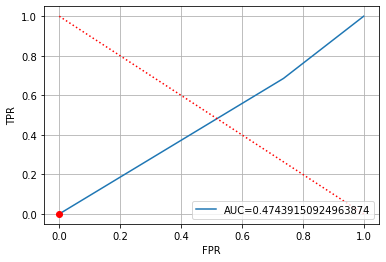

array([2.])

In [89]:
ROC(labels, predictions)